# Problem Statement 3.1

Import the file 'gold.csv' (you will find this in the intro section to download or in '/Data/gold.csv' if you are using the jupyter notebook), which contains the data of the last 2 years price action of Indian (MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'. One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial function of the same inputs. Also, one of the 2 columns is partially filled.

* Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire column.
* Also, try to fit the other column as well using a new linear regression model. Check if the predictions are accurate. Mention which column is a linear function and which is polynomial.
    (Hint: Plotting a histogram & distplot helps in recognizing the discrepencies in prediction, if any.)


In [1]:
%matplotlib inline
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [2]:
gold = pd.read_csv('D:/DS/aspiration.ai/GOLD.csv')

In [3]:
pandas_profiling.ProfileReport(gold)

Number of variables,9
Number of observations,512
Total Missing (%),2.2%
Total size in memory,36.1 KiB
Average record size in memory,72.2 B
Numeric,3
Categorical,2
Boolean,0
Date,0
Text (Unique),1
Rejected,3


In [4]:
gold.shape

(512, 9)

In [5]:
gold.describe()

,Price,Open,High,Low,Pred,new
count,512.000000,512.000000,512.000000,512.000000,411.000000,512.000000
mean,30364.583984,30368.412109,30491.089844,30243.320312,341.712895,245.161859
std,1284.378623,1296.856656,1307.031684,1271.936410,271.075609,205.788897
min,27812.000000,27805.000000,27887.000000,27620.000000,-146.000000,11.109814
25%,29432.500000,29436.750000,29499.750000,29345.750000,156.500000,101.369172
50%,30427.500000,30399.500000,30545.000000,30286.000000,299.000000,184.537244
75%,31271.750000,31300.000000,31447.500000,31160.750000,475.000000,320.835031
max,33753.000000,34247.000000,34400.000000,33680.000000,2210.000000,1407.321485


In [6]:
gold.sample(5)

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
33,"Jun 20, 2017",28475,28470,28530,28420,7.69K,0.01%,150.0,115.212878
246,"Apr 20, 2018",31314,31405,31440,31285,6.02K,-0.52%,263.0,64.143679
346,"Sep 10, 2018",30725,30549,30748,30526,11.42K,0.71%,245.0,399.447225
98,"Sep 20, 2017",29780,29660,29817,29660,8.42K,0.51%,83.0,277.635199
387,"Nov 07, 2018",31602,31660,31678,31530,1.80K,-0.17%,386.0,90.337964


In [7]:
print(gold.Pred.isnull().any())

True


In [8]:
print(gold.new.isnull().any())

False


* Pred column has some null values.
* new column doesnt have any null values.

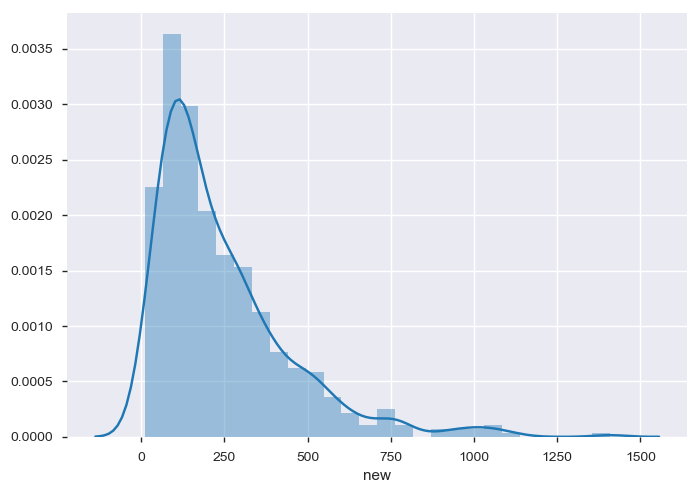

In [9]:
sns.distplot(gold.new)

In [10]:
lm_Pred = smf.ols(formula = 'Pred ~  Open + High + Low + Price', data = gold).fit()
lm_new = smf.ols(formula = 'new ~ Open + High + Low + Price', data = gold).fit()

In [11]:
lm_Pred.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Pred   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.099e+28
Date:                Sat, 29 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:32:04   Log-Likelihood:                 9566.7
No. Observations:                 411   AIC:                        -1.912e+04
Df Residuals:                     406   BIC:                        -1.910e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.774e-11   2.81e-11      1.342      0.180   -1.75e-11     9.3e-11
Open           3.0000    1.3e-14   2.31e+14      0.000       3.000       3.000
High          -1.0000   1.52e-14  -6.56e+13      0.000      -1.000      -1.000
Low           -4.0000   1.55e-14  -2.58e+14      0.000      -4.000      -4.000
Price          2.0000   1.53e-14   1.31e+14      0.000       2.000       2.000
==============================================================================
Omnibus:                     2599.303   Durbin-Watson:                   0.494
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.534
Skew:                          -0.255   Prob(JB):                     1.06e-11
Kurtosis:                       1.360   Cond. No.                     1.80e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
lm_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    new   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.118e+07
Date:                Sat, 29 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:32:04   Log-Likelihood:                -538.12
No. Observations:                 512   AIC:                             1086.
Df Residuals:                     507   BIC:                             1107.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3282      0.738      0.445      0.657      -1.122       1.778
Open          -1.0004      0.000  -2593.068      0.000      -1.001      -1.000
High           1.0050      0.000   2286.401      0.000       1.004       1.006
Low           -1.0177      0.000  -2233.145      0.000      -1.019      -1.017
Price          1.0129      0.000   2210.033      0.000       1.012       1.014
==============================================================================
Omnibus:                      543.754   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76044.049
Skew:                           4.382   Prob(JB):                         0.00
Kurtosis:                      62.057   Cond. No.                     1.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# values filled from the OLS regression results
gold['new_fill'] = gold.Open*(-1.0004) + gold.High*(1.0050) + gold.Low*(-1.0177) + gold.Price*(1.0129)

In [14]:
gold.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new,new_fill
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740,113.9815
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176,291.2397
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714,127.4352
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064,97.0030
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318,107.5326


In [15]:
gold.new_fill.isnull().any()

False

In [16]:
np.corrcoef(gold.new, gold.new_fill)

array([[1.        , 0.99999397],
       [0.99999397, 1.        ]])

Therefore, 'new' is the column which has a linear relationship with the OHLC values.

'Pred' is the column which has polynomial relationship with OHLC values.

In [17]:
gold.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new,new_fill
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740,113.9815
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176,291.2397
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714,127.4352
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064,97.0030
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318,107.5326


In [18]:
linreg = LinearRegression()
X = pd.DataFrame(gold.Price)
X = X.join(gold.Open)
X = X.join(gold.High)
X = X.join(gold.Low)

In [19]:
X.head(1)

,Price,Open,High,Low
0,28060,28400,28482,28025


In [20]:
X.shape

(512, 4)

In [21]:
X.isnull().any()

Price    False
Open     False
High     False
Low      False
dtype: bool

In [22]:
y = pd.DataFrame(gold.Pred)

In [23]:
y.shape

(512, 1)

In [24]:
y.isnull().any()

Pred    True
dtype: bool

In [25]:
y = y.fillna(y.mean())

In [26]:
y.isnull().any()

Pred    False
dtype: bool

To convert the original features into their higher order terms we will use the PolynomialFeatures class provided by sklearn. Here, we assume a quadratic polynomial. Next, we train the model using Linear Regression.

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly_features= PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

linreg = LinearRegression()
linreg.fit(X_poly, y)
y_poly_pred = linreg.predict(X_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

88.00778440032573
0.8683722686139481


Check for cubic polynomial (degree = 3)

In [29]:
poly_features= PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

linreg = LinearRegression()
linreg.fit(X_poly, y)
y_poly_pred = linreg.predict(X_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

118.29250531912525
0.7621957125385442


Hence, the quadratic polynomial equation is a better fit for the given data.

In [30]:
gold['Pred_fill'] = np.asarray(y_poly_pred)

In [31]:
gold.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new,new_fill,Pred_fill
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740,113.9815,715.753652
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176,291.2397,-95.664338
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714,127.4352,28.769839
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064,97.0030,260.867870
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318,107.5326,86.656998


In [32]:
gold['Pred_fill'].isnull().any()

False

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


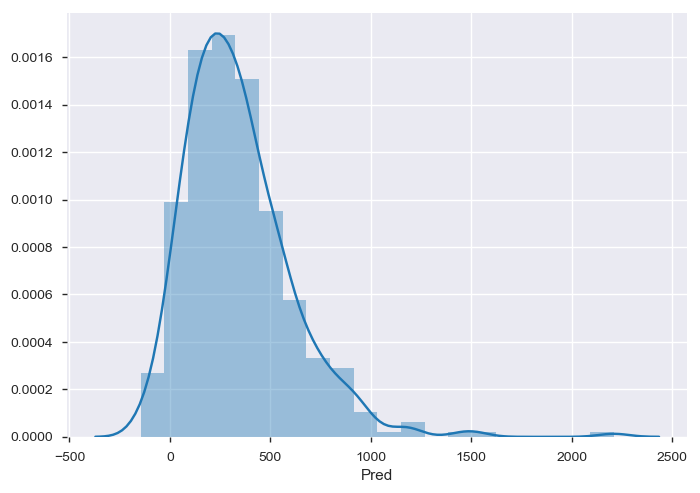

In [33]:
sns.distplot(gold.Pred, bins = 20)

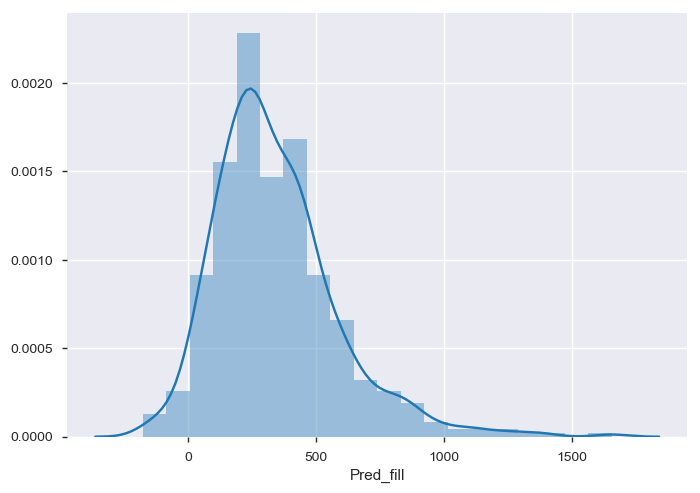

In [34]:
sns.distplot(gold.Pred_fill, bins = 20)

# CAPM Analysis and Beta Calculation

* CAPM(Capital Asset Pricing Model) attempts to price securities by examining the relationship that exists between expected returns and risk.

* The Beta of an asset is a measure of the sensitivity of its returns relative to a market benchmark (usually a market index). How sensitive/insensitive is the returns of an asset to the overall market returns (usually a market index like S&P 500 index). What happens when the market jumps, does the returns of the asset jump accordingly or jump somehow? 

# CAPM

What Is the Capital Asset Pricing Model?

The Capital Asset Pricing Model (CAPM) describes the relationship between systematic risk and expected return for assets, particularly stocks. CAPM is widely used throughout finance for pricing risky securities and generating expected returns for assets given the risk of those assets and cost of capital.

Expected ROI = Risk free Rate + Beta * (Expected Rate of Return - Risk free Rate)


Expected ROI = Risk free Rate + Beta * Market Risk Premium

# Beta

Equivalent to the covariance between the return of the security and the return of the market must be known, as well as the variance of the market returns.

# Problem Statement 3.2

Import the stock of your choosing AND the Nifty index.
Using linear regression (OLS), calculate -

* The daily Beta value for the past 3 months. (Daily= Daily returns)
* The monthly Beta value. (Monthly= Monthly returns)

Refrain from using the (covariance(x,y)/variance(x)) formula.

Attempt the question using regression.

Were the Beta values more or less than 1 ? What if it was negative?


Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results 

In [35]:
nifty = pd.read_csv('D:/DS/aspiration.ai/Nifty50.csv')
mindtree = pd.read_csv('D:/DS/aspiration.ai/mindtree_updated.csv')

In [36]:
mindtree.head()

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Index,Month,Year,Day_Perc_Change,Trend
0,1,MINDTREE,EQ,2017-05-16,509.45,507.00,515.85,506.00,511.00,511.30,...,207011,1.061317e+08,5550,82090,39.65,1,5,2017,0.363137,Slight or No change
1,2,MINDTREE,EQ,2017-05-17,511.30,507.05,519.70,502.75,504.00,506.35,...,391401,2.004375e+08,13341,150098,38.35,2,5,2017,-0.968120,Slight Negative
2,3,MINDTREE,EQ,2017-05-18,506.35,502.00,516.75,486.00,487.50,492.90,...,852336,4.309377e+08,18513,170919,20.05,3,5,2017,-2.656265,Negative
3,4,MINDTREE,EQ,2017-05-19,492.90,491.95,502.95,489.50,495.15,497.50,...,352273,1.748782e+08,8326,57853,16.42,4,5,2017,0.933252,Slight Positive
4,5,MINDTREE,EQ,2017-05-22,497.50,499.95,511.85,497.10,501.55,502.35,...,399974,2.018999e+08,9779,107089,26.77,5,5,2017,0.974874,Slight Positive


In [37]:
nifty.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [38]:
nifty['Day_Perc_Change'] = nifty.Close.pct_change()[1:]

In [39]:
nifty.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Day_Perc_Change
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97,NaN
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,0.007078
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23,0.001419
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46,-0.010109
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,-0.000164


In [40]:
nifty.shape

(494, 8)

In [41]:
mindtree.shape

(493, 21)

In [42]:
nifty = nifty.drop(nifty.index[0])

In [43]:
nifty.shape

(493, 8)

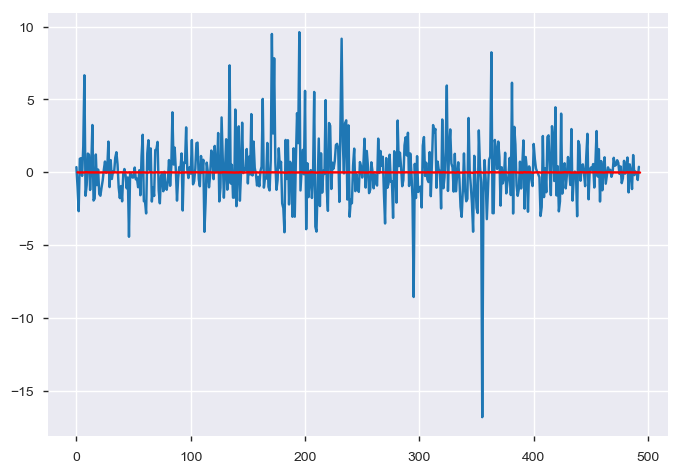

In [44]:
plt.plot(mindtree.Day_Perc_Change)
plt.plot(nifty.Day_Perc_Change, color = 'red')

Hence, It is evident that mindtree daily return is much more volatile than that of the Nifty50 index.

### Method 1

In [45]:
import statsmodels.api as sm
from statsmodels import regression

In [46]:
X = mindtree['Day_Perc_Change'].values
Y = nifty['Day_Perc_Change'].values

In [47]:
def linreg(x, y):
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y, x).fit()
    x = x[:, 1]
    return model.params[0], model.params[1]

alpha, beta = linreg(X, Y)
print('alpha: ' + str(alpha))
print('beta: ' + str(beta))

alpha: 0.0002341788174306572
beta: 0.0008217960538694977


# -----------------------------------------------------------------------------------------------------------

### Method 2

In [48]:
returns = pd.DataFrame(mindtree.Day_Perc_Change)

In [49]:
returns = returns.rename(index = str, columns={"Day_Perc_Change": "mindtree_dpc"})

In [50]:
returns['nifty_dpc'] = nifty['Day_Perc_Change'].values

In [51]:
returns.head()

,mindtree_dpc,nifty_dpc
0,0.363137,0.007078
1,-0.968120,0.001419
2,-2.656265,-0.010109
3,0.933252,-0.000164
4,0.974874,0.001098


We regress mindtree_dpc with nifty_dpc and find the mean values of the coefficient obtained, which will be the beta.
Since, accordin got the regresion formula, [stock return = intercept + beta*(market return)]

In [52]:
X = returns.mindtree_dpc
X1 = sm.add_constant(X)
y = returns.nifty_dpc

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [53]:
model = sm.OLS(y, X1)
result = model.fit()

In [54]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              nifty_dpc   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     31.44
Date:                Sat, 29 Jun 2019   Prob (F-statistic):           3.44e-08
Time:                        22:32:05   Log-Likelihood:                 1748.1
No. Observations:                 493   AIC:                            -3492.
Df Residuals:                     491   BIC:                            -3484.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0002      0.000      0.742      0.459      -0.000       0.001
mindtree_dpc     0.0008      0.000      5.607      0.000       0.001       0.001
==============================================================================
Omnibus:                        8.092   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.017   Jarque-Bera (JB):               10.510
Skew:                          -0.157   Prob(JB):                      0.00522
Kurtosis:                       3.643   Cond. No.                         2.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# -------------------------------------------------------------------------------------------------------------

# Method 3

In [55]:
from scipy import stats

In [56]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

In [57]:
print(slope)

0.0008217960538694975


Hence, by all 3 methods, the beta value comes out to be 0.0008

# Monthly Returns

### For monthy percent change ie., monthly returns, we resample the dates for each business month.

In [63]:
a = pd.DataFrame(mindtree['Date'])
a['Close Price'] = mindtree['Close Price']
a.head(2)

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Close Price
0,2017-05-16,511.30
1,2017-05-17,506.35


In [73]:
b = pd.DataFrame(nifty['Date'])
b['Close'] = nifty['Close']
b.head(2)

,Date,Close
1,16-May-2017,9512.25
2,17-May-2017,9525.75


In [65]:
a['Date'].dtype

dtype('O')

In [67]:
a.Date = pd.to_datetime(a.Date)

In [69]:
a['Date'].dtype

dtype('<M8[ns]')

In [70]:
b['Date'].dtype

dtype('<M8[ns]')

In [77]:
a = a.set_index(a.Date)

In [102]:
mindtree_mpt = a.resample('BM', how=lambda x: x[-1])

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


In [103]:
pd.DataFrame(mindtree_mpt)

,Date,Close Price
Date,,
2017-05-31,2017-05-31,543.95
2017-06-30,2017-06-30,529.00
2017-07-31,2017-07-31,477.45
2017-08-31,2017-08-31,461.00
2017-09-29,2017-09-29,464.85
2017-10-31,2017-10-31,479.65
2017-11-30,2017-11-30,539.20
2017-12-29,2017-12-29,612.40
2018-01-31,2018-01-31,770.00


In [105]:
mindtree_mpt['Close Price'].pct_change()

Date
2017-05-31         NaN
2017-06-30   -0.027484
2017-07-31   -0.097448
2017-08-31   -0.034454
2017-09-29    0.008351
2017-10-31    0.031838
2017-11-30    0.124153
2017-12-29    0.135757
2018-01-31    0.257348
2018-02-28    0.058571
2018-03-30   -0.052938
2018-04-30    0.405013
2018-05-31   -0.070671
2018-06-29   -0.020884
2018-07-31   -0.055325
2018-08-31    0.195645
2018-09-28   -0.073069
2018-10-31   -0.176530
2018-11-30    0.030323
2018-12-31   -0.013860
2019-01-31    0.034182
2019-02-28    0.016498
2019-03-29    0.039283
2019-04-30    0.038909
2019-05-31   -0.002191
Freq: BM, Name: Close Price, dtype: float64

In [106]:
monthly_returns = pd.DataFrame(mindtree_mpt['Close Price'].pct_change())

In [107]:
monthly_returns.head()

,Close Price
Date,
2017-05-31,NaN
2017-06-30,-0.027484
2017-07-31,-0.097448
2017-08-31,-0.034454
2017-09-29,0.008351


In [108]:
monthly_returns = monthly_returns.rename(index = str, columns={"Close Price": "mindtree_mpc"})

In [109]:
monthly_returns.head()

,mindtree_mpc
Date,
2017-05-31 00:00:00,NaN
2017-06-30 00:00:00,-0.027484
2017-07-31 00:00:00,-0.097448
2017-08-31 00:00:00,-0.034454
2017-09-29 00:00:00,0.008351


In [115]:
b.Date = pd.to_datetime(b.Date)

In [116]:
b = b.set_index(b.Date)

In [117]:
nifty_mpt = b.resample('BM', how=lambda x: x[-1])

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


In [118]:
pd.DataFrame(nifty_mpt)

,Date,Close
Date,,
2017-05-31,2017-05-31,9621.25
2017-06-30,2017-06-30,9520.90
2017-07-31,2017-07-31,10077.10
2017-08-31,2017-08-31,9917.90
2017-09-29,2017-09-29,9788.60
2017-10-31,2017-10-31,10335.30
2017-11-30,2017-11-30,10226.55
2017-12-29,2017-12-29,10530.70
2018-01-31,2018-01-31,11027.70


In [121]:
nifty_mpt['Close'].pct_change()

Date
2017-05-31         NaN
2017-06-30   -0.010430
2017-07-31    0.058419
2017-08-31   -0.015798
2017-09-29   -0.013037
2017-10-31    0.055851
2017-11-30   -0.010522
2017-12-29    0.029741
2018-01-31    0.047195
2018-02-28   -0.048501
2018-03-30   -0.036134
2018-04-30    0.061862
2018-05-31   -0.000298
2018-06-29   -0.002035
2018-07-31    0.059939
2018-08-31    0.028530
2018-09-28   -0.064214
2018-10-31   -0.049755
2018-11-30    0.047191
2018-12-31   -0.001306
2019-01-31   -0.002909
2019-02-28   -0.003550
2019-03-29    0.077035
2019-04-30    0.010689
2019-05-31   -0.051068
Freq: BM, Name: Close, dtype: float64

In [122]:
monthly_returns['nifty_mpc'] = pd.DataFrame(nifty_mpt['Close'].pct_change())

In [123]:
monthly_returns.head()

,mindtree_mpc,nifty_mpc
Date,,
2017-05-31 00:00:00,NaN,NaN
2017-06-30 00:00:00,-0.027484,-0.010430
2017-07-31 00:00:00,-0.097448,0.058419
2017-08-31 00:00:00,-0.034454,-0.015798
2017-09-29 00:00:00,0.008351,-0.013037


In [124]:
monthly_returns = monthly_returns.drop(monthly_returns.index[0])

In [125]:
monthly_returns.head()

,mindtree_mpc,nifty_mpc
Date,,
2017-06-30 00:00:00,-0.027484,-0.010430
2017-07-31 00:00:00,-0.097448,0.058419
2017-08-31 00:00:00,-0.034454,-0.015798
2017-09-29 00:00:00,0.008351,-0.013037
2017-10-31 00:00:00,0.031838,0.055851


In [126]:
monthly_returns.shape

(24, 2)

In [127]:
X = monthly_returns.mindtree_mpc
X1 = sm.add_constant(X)
y = monthly_returns.nifty_mpc

In [128]:
model = sm.OLS(y, X1)
result = model.fit()

In [129]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              nifty_mpc   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     5.353
Date:                Sat, 29 Jun 2019   Prob (F-statistic):             0.0304
Time:                        22:58:28   Log-Likelihood:                 45.773
No. Observations:                  24   AIC:                            -87.55
Df Residuals:                      22   BIC:                            -85.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0023      0.008      0.297      0.769      -0.014       0.019
mindtree_mpc     0.1471      0.064      2.314      0.030       0.015       0.279
==============================================================================
Omnibus:                        1.226   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                0.995
Skew:                           0.470   Prob(JB):                        0.608
Kurtosis:                       2.668   Cond. No.                         8.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Therefore, beta value for the monthly return (ie., coeffiecient of 'mindtree_mpc' in the regression equation is 0.1471)